In [21]:
# Data Manupulation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data fetching
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

In [22]:
# Read the data from Yahoo
df= pdr.get_data_yahoo('SPY', '2012-01-01', '2017-01-01')

df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]
df.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000
2012-01-04,127.199997,127.809998,126.709999,127.699997
2012-01-05,127.010002,128.229996,126.430000,128.039993
2012-01-06,128.199997,128.220001,127.290001,127.709999
2012-01-09,128.000000,128.179993,127.410004,128.020004


In [23]:
# Predictor variables
df['Open-Close']= df.Open -df.Close
df['High-Low']  = df.High - df.Low
df =df.dropna()
X= df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2012-01-03,0.260002,0.950005
2012-01-04,-0.500000,1.099999
2012-01-05,-1.029991,1.799996
2012-01-06,0.489998,0.930000
2012-01-09,-0.020004,0.769989


In [24]:
# Target variable
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [25]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [26]:
# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=15)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.61
Test_data Accuracy: 0.51


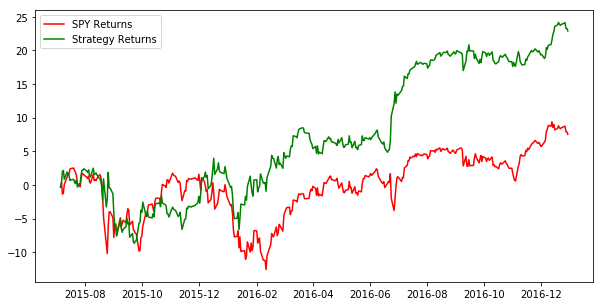

In [27]:
# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

# SPY Cumulative Returns
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = df[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [28]:
# Calculate Sharpe reatio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 0.78
